<a href="https://colab.research.google.com/github/OtavioCarvalho1/Time_Series/blob/main/SHM_ML_Vers%C3%A3o_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/OtavioCarvalho1/Time_Series.git

Cloning into 'Time_Series'...
remote: Enumerating objects: 1262, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 1262 (delta 7), reused 0 (delta 0), pack-reused 1244
Receiving objects: 100% (1262/1262), 169.52 MiB | 19.07 MiB/s, done.
Resolving deltas: 100% (23/23), done.
Checking out files: 100% (1209/1209), done.


In [ ]:
!pip install statsmodels --upgrade

     |████████████████████████████████| 9.5 MB 18.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import numpy as np

from numpy import mean, square, sqrt

import pandas as pd

import matplotlib.pyplot as plt

from scipy.stats import kurtosis, skew

from sklearn.preprocessing import StandardScaler

from math import sqrt

from statsmodels.tsa.ar_model import AutoReg

from statistics import stdev

from sklearn.model_selection import train_test_split

import seaborn as sns

# **Extração de Features**

In [ ]:
# função para extração de features dos sinais mas sem colocar ruído

def get_features(arquivo):
    names = ['Tempo [s]', 'Amplitude PZT Atuador', 'Amplitude PZT Sensor']
    df = pd.read_csv(arquivo, names=names)
    peak = np.max(df['Amplitude PZT Sensor']) #1 - peak
    mean = df['Amplitude PZT Sensor'].mean() #2 - mean
    ms = np.mean(np.square(df['Amplitude PZT Sensor'])) #3 - mean square
    rms = np.sqrt(ms) #4 - root mean square
    var = df['Amplitude PZT Sensor'].var() #5 - variance
    std = stdev(df['Amplitude PZT Sensor']) #6 - standard deviation
    skw = skew(df['Amplitude PZT Sensor']) #7 - skewness
    kurt = kurtosis(df['Amplitude PZT Sensor']) #8 - kurtosis
    crest_f = peak/rms #9 - crest factor
    K_f = peak*rms #10 - K-Factor
    md = pd.DataFrame([[peak, mean, ms, rms, var, std, skw, kurt, crest_f, K_f]], columns=['Peak', 'Mean', 'Mean²', 'RMS', 'Variance', 'Std Deviation', 'Skewness', 'Kurtosis', 'Crest Factor', 'K-Factor']) 
    return md

In [ ]:
# função que coloca ruído no sinal de 80 dB e extrai as features dele

def get_features_noise_80(arquivo):

    names = ['Tempo [s]', 'Amplitude PZT Atuador', 'Amplitude PZT Sensor']
    df = pd.read_csv(arquivo, names=names)

    x_watts = df['Amplitude PZT Sensor']**2
    x_dB = 10 * np.log10(x_watts)
    target_SNR_dB = 80
    sig_avg_watts = np.mean(x_watts)
    sig_avg_db = 10 * np.log10(sig_avg_watts)
    noise_avg_db = sig_avg_db - target_SNR_dB
    noise_avg_watts = 10 ** (noise_avg_db / 10)
    mean_noise = 0
    noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(x_watts))
    y_volts = df['Amplitude PZT Sensor'] + noise_volts
    noise_data = y_volts

    peak = np.max(noise_data) #1 - peak
    mean = noise_data.mean() #2 - mean
    ms = np.mean(np.square(noise_data)) #3 - mean square
    rms = np.sqrt(ms) #4 - root mean square
    var = noise_data.var() #5 - variance
    std = stdev(noise_data) #6 - standard deviation
    skw = skew(noise_data) #7 - skewness
    kurt = kurtosis(noise_data) #8 - kurtosis
    crest_f = peak/rms #9 - crest factor
    K_f = peak*rms #10 - K-Factor

    md = pd.DataFrame([[peak, mean, ms, rms, var, std, skw, kurt, crest_f, K_f]], columns=['Peak', 'Mean', 'Mean²', 'RMS', 'Variance', 'Std Deviation', 'Skewness', 'Kurtosis', 'Crest Factor', 'K-Factor']) # esta função retorna um dataframe do pandas com 10 linhas contendo todas as features extraídas
    
    return md

In [ ]:
# função que coloca ruído no sinal de 120 dB e extrai as features dele

def get_features_noise_120(arquivo):

    names = ['Tempo [s]', 'Amplitude PZT Atuador', 'Amplitude PZT Sensor']
    df = pd.read_csv(arquivo, names=names)

    x_watts = df['Amplitude PZT Sensor']**2
    x_dB = 10 * np.log10(x_watts)
    target_SNR_dB = 120
    sig_avg_watts = np.mean(x_watts)
    sig_avg_db = 10 * np.log10(sig_avg_watts)
    noise_avg_db = sig_avg_db - target_SNR_dB
    noise_avg_watts = 10 ** (noise_avg_db / 10)
    mean_noise = 0
    noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(x_watts))
    y_volts = df['Amplitude PZT Sensor'] + noise_volts
    noise_data = y_volts

    peak = np.max(noise_data) #1 - peak
    mean = noise_data.mean() #2 - mean
    ms = np.mean(np.square(noise_data)) #3 - mean square
    rms = np.sqrt(ms) #4 - root mean square
    var = noise_data.var() #5 - variance
    std = stdev(noise_data) #6 - standard deviation
    skw = skew(noise_data) #7 - skewness
    kurt = kurtosis(noise_data) #8 - kurtosis
    crest_f = peak/rms #9 - crest factor
    K_f = peak*rms #10 - K-Factor

    md = pd.DataFrame([[peak, mean, ms, rms, var, std, skw, kurt, crest_f, K_f]], columns=['Peak', 'Mean', 'Mean²', 'RMS', 'Variance', 'Std Deviation', 'Skewness', 'Kurtosis', 'Crest Factor', 'K-Factor']) # esta função retorna um dataframe do pandas com 10 linhas contendo todas as features extraídas
    
    return md

In [ ]:
# 100 kHz

sem_dano_100 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_1_100KHz__5ciclos_B3_A3.csv")
sem_dano_100_2 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_2_100KHz__5ciclos_B3_A3.csv")
sem_dano_100_3 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_3_100KHz__5ciclos_B3_A3.csv")
sem_dano_100_4 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_4_100KHz__5ciclos_B3_A3.csv")

dano_1_100 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn1/PL0402_Dn12_1_100KHz__5ciclos_B3_A3.csv")

dano_2_100 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn2/PL0402_Dn22_1_100KHz__5ciclos_B3_A3.csv")

dano_3_100 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn3/PL0402_Dn32_1_100KHz__5ciclos_B3_A3.csv")

dano_4_100 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn4/PL0402_Dn42_1_100KHz__5ciclos_B3_A3.csv")


sem_dano_100_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_1_100KHz__5ciclos_B3_A3.csv")
sem_dano_100_80dB_2 = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_2_100KHz__5ciclos_B3_A3.csv")
sem_dano_100_80dB_3 = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_3_100KHz__5ciclos_B3_A3.csv")
sem_dano_100_80dB_4 = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_4_100KHz__5ciclos_B3_A3.csv")

dano_1_100_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn1/PL0402_Dn12_1_100KHz__5ciclos_B3_A3.csv")

dano_2_100_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn2/PL0402_Dn22_1_100KHz__5ciclos_B3_A3.csv")

dano_3_100_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn3/PL0402_Dn32_1_100KHz__5ciclos_B3_A3.csv")

dano_4_100_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn4/PL0402_Dn42_1_100KHz__5ciclos_B3_A3.csv")


sem_dano_100_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_1_100KHz__5ciclos_B3_A3.csv")
sem_dano_100_120dB_2 = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_2_100KHz__5ciclos_B3_A3.csv")
sem_dano_100_120dB_3 = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_3_100KHz__5ciclos_B3_A3.csv")
sem_dano_100_120dB_4 = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_4_100KHz__5ciclos_B3_A3.csv")

dano_1_100_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn1/PL0402_Dn12_1_100KHz__5ciclos_B3_A3.csv")

dano_2_100_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn2/PL0402_Dn22_1_100KHz__5ciclos_B3_A3.csv")

dano_3_100_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn3/PL0402_Dn32_1_100KHz__5ciclos_B3_A3.csv")

dano_4_100_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn4/PL0402_Dn42_1_100KHz__5ciclos_B3_A3.csv")


df_100 = [sem_dano_100, sem_dano_100_2, sem_dano_100_3, sem_dano_100_4, dano_1_100, dano_2_100, dano_3_100, dano_4_100, 
                sem_dano_100_80dB, sem_dano_100_80dB_2, sem_dano_100_80dB_3, sem_dano_100_80dB_4, dano_1_100_80dB, dano_2_100_80dB, dano_3_100_80dB, dano_4_100_80dB, 
                sem_dano_100_120dB, sem_dano_100_120dB_2, sem_dano_100_120dB_3, sem_dano_100_120dB_4, dano_1_100_120dB, dano_2_100_120dB, dano_3_100_120dB, dano_4_100_120dB]

df_100_no_noise = [sem_dano_100, sem_dano_100_2, sem_dano_100_3, sem_dano_100_4, dano_1_100, dano_2_100, dano_3_100, dano_4_100]

df_100_just_noise = [sem_dano_100_80dB, sem_dano_100_80dB_2, sem_dano_100_80dB_3, sem_dano_100_80dB_4, dano_1_100_80dB, dano_2_100_80dB, dano_3_100_80dB, dano_4_100_80dB, 
                     sem_dano_100_120dB, sem_dano_100_120dB_2, sem_dano_100_120dB_3, sem_dano_100_120dB_4, dano_1_100_120dB, dano_2_100_120dB, dano_3_100_120dB, dano_4_100_120dB]

# 150 kHz

sem_dano_150 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_1_150KHz__5ciclos_B3_A3.csv")
sem_dano_150_2 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_2_150KHz__5ciclos_B3_A3.csv")
sem_dano_150_3 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_3_150KHz__5ciclos_B3_A3.csv")
sem_dano_150_4 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_4_150KHz__5ciclos_B3_A3.csv")

dano_1_150 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn1/PL0402_Dn12_1_150KHz__5ciclos_B3_A3.csv")

dano_2_150 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn2/PL0402_Dn22_1_150KHz__5ciclos_B3_A3.csv")

dano_3_150 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn3/PL0402_Dn32_1_150KHz__5ciclos_B3_A3.csv")

dano_4_150 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn4/PL0402_Dn42_1_150KHz__5ciclos_B3_A3.csv")


sem_dano_150_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_1_150KHz__5ciclos_B3_A3.csv")
sem_dano_150_80dB_2 = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_2_150KHz__5ciclos_B3_A3.csv")
sem_dano_150_80dB_3 = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_3_150KHz__5ciclos_B3_A3.csv")
sem_dano_150_80dB_4 = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_4_150KHz__5ciclos_B3_A3.csv")

dano_1_150_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn1/PL0402_Dn12_1_150KHz__5ciclos_B3_A3.csv")

dano_2_150_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn2/PL0402_Dn22_1_150KHz__5ciclos_B3_A3.csv")

dano_3_150_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn3/PL0402_Dn32_1_150KHz__5ciclos_B3_A3.csv")

dano_4_150_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn4/PL0402_Dn42_1_150KHz__5ciclos_B3_A3.csv")


sem_dano_150_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_1_150KHz__5ciclos_B3_A3.csv")
sem_dano_150_120dB_2 = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_2_150KHz__5ciclos_B3_A3.csv")
sem_dano_150_120dB_3 = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_3_150KHz__5ciclos_B3_A3.csv")
sem_dano_150_120dB_4 = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_4_150KHz__5ciclos_B3_A3.csv")

dano_1_150_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn1/PL0402_Dn12_1_150KHz__5ciclos_B3_A3.csv")

dano_2_150_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn2/PL0402_Dn22_1_150KHz__5ciclos_B3_A3.csv")

dano_3_150_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn3/PL0402_Dn32_1_150KHz__5ciclos_B3_A3.csv")

dano_4_150_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn4/PL0402_Dn42_1_150KHz__5ciclos_B3_A3.csv")

df_150 = [sem_dano_150, sem_dano_150_2, sem_dano_150_3, sem_dano_150_4, dano_1_150, dano_2_150, dano_3_150, dano_4_150, 
          sem_dano_150_80dB, sem_dano_150_80dB_2, sem_dano_150_80dB_3, sem_dano_150_80dB_4, dano_1_150_80dB, dano_2_150_80dB, dano_3_150_80dB, dano_4_150_80dB, 
          sem_dano_150_120dB, sem_dano_150_120dB_2, sem_dano_150_120dB_3, sem_dano_150_120dB_4, dano_1_150_120dB, dano_2_150_120dB, dano_3_150_120dB, dano_4_150_120dB]

df_150_no_noise = [sem_dano_150, sem_dano_150_2, sem_dano_150_3, sem_dano_150_4, dano_1_150, dano_2_150, dano_3_150, dano_4_150]

df_150_just_noise = [sem_dano_150_80dB, sem_dano_150_80dB_2, sem_dano_150_80dB_3, sem_dano_150_80dB_4, dano_1_150_80dB, dano_2_150_80dB, dano_3_150_80dB, dano_4_150_80dB, 
                     sem_dano_150_120dB, sem_dano_150_120dB_2, sem_dano_150_120dB_3, sem_dano_150_120dB_4, dano_1_150_120dB, dano_2_150_120dB, dano_3_150_120dB, dano_4_150_120dB]


# 200 kHz 

sem_dano_200 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_1_200KHz__5ciclos_B3_A3.csv")
sem_dano_200_2 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_2_200KHz__5ciclos_B3_A3.csv")
sem_dano_200_3 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_3_200KHz__5ciclos_B3_A3.csv")
sem_dano_200_4 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_4_200KHz__5ciclos_B3_A3.csv")

dano_1_200 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn1/PL0402_Dn12_1_200KHz__5ciclos_B3_A3.csv")

dano_2_200 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn2/PL0402_Dn22_1_200KHz__5ciclos_B3_A3.csv")

dano_3_200 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn3/PL0402_Dn32_1_200KHz__5ciclos_B3_A3.csv")

dano_4_200 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn4/PL0402_Dn42_1_200KHz__5ciclos_B3_A3.csv")


sem_dano_200_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_1_200KHz__5ciclos_B3_A3.csv")
sem_dano_200_80dB_2 = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_2_200KHz__5ciclos_B3_A3.csv")
sem_dano_200_80dB_3 = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_3_200KHz__5ciclos_B3_A3.csv")
sem_dano_200_80dB_4 = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_4_200KHz__5ciclos_B3_A3.csv")

dano_1_200_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn1/PL0402_Dn12_1_200KHz__5ciclos_B3_A3.csv")

dano_2_200_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn2/PL0402_Dn22_1_200KHz__5ciclos_B3_A3.csv")

dano_3_200_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn3/PL0402_Dn32_1_200KHz__5ciclos_B3_A3.csv")

dano_4_200_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn4/PL0402_Dn42_1_200KHz__5ciclos_B3_A3.csv")


sem_dano_200_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_1_200KHz__5ciclos_B3_A3.csv")
sem_dano_200_120dB_2 = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_2_200KHz__5ciclos_B3_A3.csv")
sem_dano_200_120dB_3 = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_3_200KHz__5ciclos_B3_A3.csv")
sem_dano_200_120dB_4 = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_4_200KHz__5ciclos_B3_A3.csv")

dano_1_200_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn1/PL0402_Dn12_1_200KHz__5ciclos_B3_A3.csv")

dano_2_200_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn2/PL0402_Dn22_1_200KHz__5ciclos_B3_A3.csv")

dano_3_200_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn3/PL0402_Dn32_1_200KHz__5ciclos_B3_A3.csv")

dano_4_200_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn4/PL0402_Dn42_1_200KHz__5ciclos_B3_A3.csv")

df_200 = [sem_dano_200, sem_dano_200_2, sem_dano_200_3, sem_dano_200_4, dano_1_200, dano_2_200, dano_3_200, dano_4_200, 
          sem_dano_200_80dB, sem_dano_200_80dB_2, sem_dano_200_80dB_3, sem_dano_200_80dB_4, dano_1_200_80dB, dano_2_200_80dB, dano_3_200_80dB, dano_4_200_80dB, 
          sem_dano_200_120dB, sem_dano_200_120dB_2, sem_dano_200_120dB_3, sem_dano_200_120dB_4, dano_1_200_120dB, dano_2_200_120dB, dano_3_200_120dB, dano_4_200_120dB]

df_200_no_noise = [sem_dano_200, sem_dano_200_2, sem_dano_200_3, sem_dano_200_4, dano_1_200, dano_2_200, dano_3_200, dano_4_200]

df_200_just_noise = [sem_dano_200_80dB, sem_dano_200_80dB_2, sem_dano_200_80dB_3, sem_dano_200_80dB_4, dano_1_200_80dB, dano_2_200_80dB, dano_3_200_80dB, dano_4_200_80dB, 
                     sem_dano_200_120dB, sem_dano_200_120dB_2, sem_dano_200_120dB_3, sem_dano_200_120dB_4, dano_1_200_120dB, dano_2_200_120dB, dano_3_200_120dB, dano_4_200_120dB]

# 250 kHz

sem_dano_250 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_1_250KHz__5ciclos_B3_A3.csv")
sem_dano_250_2 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_2_250KHz__5ciclos_B3_A3.csv")
sem_dano_250_3 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_3_250KHz__5ciclos_B3_A3.csv")
sem_dano_250_4 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_4_250KHz__5ciclos_B3_A3.csv")

dano_1_250 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn1/PL0402_Dn12_1_250KHz__5ciclos_B3_A3.csv")

dano_2_250 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn2/PL0402_Dn22_1_250KHz__5ciclos_B3_A3.csv")

dano_3_250 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn3/PL0402_Dn32_1_250KHz__5ciclos_B3_A3.csv")

dano_4_250 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn4/PL0402_Dn42_1_250KHz__5ciclos_B3_A3.csv")


sem_dano_250_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_1_250KHz__5ciclos_B3_A3.csv")
sem_dano_250_80dB_2 = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_2_250KHz__5ciclos_B3_A3.csv")
sem_dano_250_80dB_3 = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_3_250KHz__5ciclos_B3_A3.csv")
sem_dano_250_80dB_4 = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_4_250KHz__5ciclos_B3_A3.csv")

dano_1_250_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn1/PL0402_Dn12_1_250KHz__5ciclos_B3_A3.csv")

dano_2_250_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn2/PL0402_Dn22_1_250KHz__5ciclos_B3_A3.csv")

dano_3_250_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn3/PL0402_Dn32_1_250KHz__5ciclos_B3_A3.csv")

dano_4_250_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn4/PL0402_Dn42_1_250KHz__5ciclos_B3_A3.csv")


sem_dano_250_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_1_250KHz__5ciclos_B3_A3.csv")
sem_dano_250_120dB_2 = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_2_250KHz__5ciclos_B3_A3.csv")
sem_dano_250_120dB_3 = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_3_250KHz__5ciclos_B3_A3.csv")
sem_dano_250_120dB_4 = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_4_250KHz__5ciclos_B3_A3.csv")

dano_1_250_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn1/PL0402_Dn12_1_250KHz__5ciclos_B3_A3.csv")

dano_2_250_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn2/PL0402_Dn22_1_250KHz__5ciclos_B3_A3.csv")

dano_3_250_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn3/PL0402_Dn32_1_250KHz__5ciclos_B3_A3.csv")

dano_4_250_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn4/PL0402_Dn42_1_250KHz__5ciclos_B3_A3.csv")

df_250 = [sem_dano_250, sem_dano_250_2, sem_dano_250_3, sem_dano_250_4, dano_1_250, dano_2_250, dano_3_250, dano_4_250, 
          sem_dano_250_80dB, sem_dano_250_80dB_2, sem_dano_250_80dB_3, sem_dano_250_80dB_4, dano_1_250_80dB, dano_2_250_80dB, dano_3_250_80dB, dano_4_250_80dB, 
          sem_dano_250_120dB, sem_dano_250_120dB_2, sem_dano_250_120dB_3, sem_dano_250_120dB_4, dano_1_250_120dB, dano_2_250_120dB, dano_3_250_120dB, dano_4_250_120dB]

df_250_no_noise = [sem_dano_250, sem_dano_250_2, sem_dano_250_3, sem_dano_250_4, dano_1_250, dano_2_250, dano_3_250, dano_4_250]

df_250_just_noise = [sem_dano_250_80dB, sem_dano_250_80dB_2, sem_dano_250_80dB_3, sem_dano_250_80dB_4, dano_1_250_80dB, dano_2_250_80dB, dano_3_250_80dB, dano_4_250_80dB, 
                     sem_dano_250_120dB, sem_dano_250_120dB_2, sem_dano_250_120dB_3, sem_dano_250_120dB_4, dano_1_250_120dB, dano_2_250_120dB, dano_3_250_120dB, dano_4_250_120dB]

# 300 kHz

sem_dano_300 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_1_300KHz__5ciclos_B3_A3.csv")
sem_dano_300_2 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_2_300KHz__5ciclos_B3_A3.csv")
sem_dano_300_3 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_3_300KHz__5ciclos_B3_A3.csv")
sem_dano_300_4 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_4_300KHz__5ciclos_B3_A3.csv")

dano_1_300 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn1/PL0402_Dn12_1_300KHz__5ciclos_B3_A3.csv")

dano_2_300 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn2/PL0402_Dn22_1_300KHz__5ciclos_B3_A3.csv")

dano_3_300 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn3/PL0402_Dn32_1_300KHz__5ciclos_B3_A3.csv")

dano_4_300 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn4/PL0402_Dn42_1_300KHz__5ciclos_B3_A3.csv")


sem_dano_300_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_1_300KHz__5ciclos_B3_A3.csv")
sem_dano_300_80dB_2 = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_2_300KHz__5ciclos_B3_A3.csv")
sem_dano_300_80dB_3 = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_3_300KHz__5ciclos_B3_A3.csv")
sem_dano_300_80dB_4 = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_4_300KHz__5ciclos_B3_A3.csv")

dano_1_300_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn1/PL0402_Dn12_1_300KHz__5ciclos_B3_A3.csv")

dano_2_300_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn2/PL0402_Dn22_1_300KHz__5ciclos_B3_A3.csv")

dano_3_300_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn3/PL0402_Dn32_1_300KHz__5ciclos_B3_A3.csv")

dano_4_300_80dB = get_features_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn4/PL0402_Dn42_1_300KHz__5ciclos_B3_A3.csv")


sem_dano_300_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_1_300KHz__5ciclos_B3_A3.csv")
sem_dano_300_120dB_2 = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_2_300KHz__5ciclos_B3_A3.csv")
sem_dano_300_120dB_3 = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_3_300KHz__5ciclos_B3_A3.csv")
sem_dano_300_120dB_4 = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_4_300KHz__5ciclos_B3_A3.csv")

dano_1_300_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn1/PL0402_Dn12_1_300KHz__5ciclos_B3_A3.csv")

dano_2_300_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn2/PL0402_Dn22_1_300KHz__5ciclos_B3_A3.csv")

dano_3_300_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn3/PL0402_Dn32_1_300KHz__5ciclos_B3_A3.csv")

dano_4_300_120dB = get_features_noise_120("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn4/PL0402_Dn42_1_300KHz__5ciclos_B3_A3.csv")

df_300 = [sem_dano_300, sem_dano_300_2, sem_dano_300_3, sem_dano_300_4, dano_1_300, dano_2_300, dano_3_300, dano_4_300, 
          sem_dano_300_80dB, sem_dano_300_80dB_2, sem_dano_300_80dB_3, sem_dano_300_80dB_4, dano_1_300_80dB, dano_2_300_80dB, dano_3_300_80dB, dano_4_300_80dB, 
          sem_dano_300_120dB, sem_dano_300_120dB_2, sem_dano_300_120dB_3, sem_dano_300_120dB_4, dano_1_300_120dB, dano_2_300_120dB, dano_3_300_120dB, dano_4_300_120dB]

df_300_no_noise = [sem_dano_300, sem_dano_300_2, sem_dano_300_3, sem_dano_300_4, dano_1_300, dano_2_300, dano_3_300, dano_4_300]

df_300_just_noise = [sem_dano_300_80dB, sem_dano_300_80dB_2, sem_dano_300_80dB_3, sem_dano_300_80dB_4, dano_1_300_80dB, dano_2_300_80dB, dano_3_300_80dB, dano_4_300_80dB, 
                     sem_dano_300_120dB, sem_dano_300_120dB_2, sem_dano_300_120dB_3, sem_dano_300_120dB_4, dano_1_300_120dB, dano_2_300_120dB, dano_3_300_120dB, dano_4_300_120dB]

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
# Organizando o dataset em sem ruído, só ruído e misto.

df_mixed = [pd.concat(df_100, ignore_index=True), 
            pd.concat(df_150, ignore_index=True), 
            pd.concat(df_200, ignore_index=True), 
            pd.concat(df_250, ignore_index=True), 
            pd.concat(df_300, ignore_index=True)]

df_no_noise = [pd.concat(df_100_no_noise, ignore_index=True), 
               pd.concat(df_150_no_noise, ignore_index=True), 
               pd.concat(df_200_no_noise, ignore_index=True), 
               pd.concat(df_250_no_noise, ignore_index=True), 
               pd.concat(df_300_no_noise, ignore_index=True)]

df_just_noise = [pd.concat(df_100_just_noise, ignore_index=True), 
                 pd.concat(df_150_just_noise, ignore_index=True), 
                 pd.concat(df_200_just_noise, ignore_index=True), 
                 pd.concat(df_250_just_noise, ignore_index=True), 
                 pd.concat(df_300_just_noise, ignore_index=True)]

dataset_mixed = pd.concat(df_mixed, ignore_index=True)
dataset_no_noise = pd.concat(df_no_noise, ignore_index=True)
dataset_just_noise = pd.concat(df_just_noise, ignore_index=True)

print(dataset_mixed)
print(dataset_no_noise)
print(dataset_just_noise)


         Peak          Mean     Mean²  ...   Kurtosis  Crest Factor  K-Factor
0    0.013217  1.140910e-06  0.000005  ...   7.184161      6.130080  0.000028
1    0.013210  1.141557e-06  0.000005  ...   7.181931      6.128940  0.000028
2    0.013238  1.139077e-06  0.000005  ...   7.183232      6.138380  0.000029
3    0.013209  1.166701e-06  0.000005  ...   7.162529      6.124055  0.000028
4    0.014850  1.145254e-06  0.000005  ...   9.070766      6.728206  0.000033
..        ...           ...       ...  ...        ...           ...       ...
115  0.016792  1.182449e-07  0.000005  ...   8.841445      7.656461  0.000037
116  0.023097  2.767235e-08  0.000006  ...  15.502414      9.245666  0.000058
117  0.017213  5.050700e-08  0.000005  ...   9.672323      7.809434  0.000038
118  0.016947  2.808903e-08  0.000005  ...   9.444686      7.827942  0.000037
119  0.015402  7.471718e-08  0.000005  ...   7.609364      6.828075  0.000035

[120 rows x 10 columns]
        Peak          Mean     Mean²  .

In [ ]:
# criando outputs

estado_estrutural_mixed = ['Sem dano', 'Sem dano', 'Sem dano', 'Sem dano', 'Danificado', 'Danificado', 'Danificado', 'Danificado',
                           'Sem dano', 'Sem dano', 'Sem dano', 'Sem dano', 'Danificado', 'Danificado', 'Danificado', 'Danificado',
                           'Sem dano', 'Sem dano', 'Sem dano', 'Sem dano', 'Danificado', 'Danificado', 'Danificado', 'Danificado',
                           'Sem dano', 'Sem dano', 'Sem dano', 'Sem dano', 'Danificado', 'Danificado', 'Danificado', 'Danificado',
                           'Sem dano', 'Sem dano', 'Sem dano', 'Sem dano', 'Danificado', 'Danificado', 'Danificado', 'Danificado',
                           'Sem dano', 'Sem dano', 'Sem dano', 'Sem dano', 'Danificado', 'Danificado', 'Danificado', 'Danificado',
                           'Sem dano', 'Sem dano', 'Sem dano', 'Sem dano', 'Danificado', 'Danificado', 'Danificado', 'Danificado',
                           'Sem dano', 'Sem dano', 'Sem dano', 'Sem dano', 'Danificado', 'Danificado', 'Danificado', 'Danificado',
                           'Sem dano', 'Sem dano', 'Sem dano', 'Sem dano', 'Danificado', 'Danificado', 'Danificado', 'Danificado',
                           'Sem dano', 'Sem dano', 'Sem dano', 'Sem dano', 'Danificado', 'Danificado', 'Danificado', 'Danificado',
                           'Sem dano', 'Sem dano', 'Sem dano', 'Sem dano', 'Danificado', 'Danificado', 'Danificado', 'Danificado',
                           'Sem dano', 'Sem dano', 'Sem dano', 'Sem dano', 'Danificado', 'Danificado', 'Danificado', 'Danificado',
                           'Sem dano', 'Sem dano', 'Sem dano', 'Sem dano', 'Danificado', 'Danificado', 'Danificado', 'Danificado',
                           'Sem dano', 'Sem dano', 'Sem dano', 'Sem dano', 'Danificado', 'Danificado', 'Danificado', 'Danificado',
                           'Sem dano', 'Sem dano', 'Sem dano', 'Sem dano', 'Danificado', 'Danificado', 'Danificado', 'Danificado']

estado_estrutural_no_noise = ['Sem dano', 'Sem dano', 'Sem dano', 'Sem dano', 'Danificado', 'Danificado', 'Danificado', 'Danificado',
                              'Sem dano', 'Sem dano', 'Sem dano', 'Sem dano', 'Danificado', 'Danificado', 'Danificado', 'Danificado',
                              'Sem dano', 'Sem dano', 'Sem dano', 'Sem dano', 'Danificado', 'Danificado', 'Danificado', 'Danificado',
                              'Sem dano', 'Sem dano', 'Sem dano', 'Sem dano', 'Danificado', 'Danificado', 'Danificado', 'Danificado',
                              'Sem dano', 'Sem dano', 'Sem dano', 'Sem dano', 'Danificado', 'Danificado', 'Danificado', 'Danificado']

estado_estrutural_just_noise = ['Sem dano', 'Sem dano', 'Sem dano', 'Sem dano', 'Danificado', 'Danificado', 'Danificado', 'Danificado',
                                'Sem dano', 'Sem dano', 'Sem dano', 'Sem dano', 'Danificado', 'Danificado', 'Danificado', 'Danificado',
                                'Sem dano', 'Sem dano', 'Sem dano', 'Sem dano', 'Danificado', 'Danificado', 'Danificado', 'Danificado',
                                'Sem dano', 'Sem dano', 'Sem dano', 'Sem dano', 'Danificado', 'Danificado', 'Danificado', 'Danificado',
                                'Sem dano', 'Sem dano', 'Sem dano', 'Sem dano', 'Danificado', 'Danificado', 'Danificado', 'Danificado',
                                'Sem dano', 'Sem dano', 'Sem dano', 'Sem dano', 'Danificado', 'Danificado', 'Danificado', 'Danificado',
                                'Sem dano', 'Sem dano', 'Sem dano', 'Sem dano', 'Danificado', 'Danificado', 'Danificado', 'Danificado',
                                'Sem dano', 'Sem dano', 'Sem dano', 'Sem dano', 'Danificado', 'Danificado', 'Danificado', 'Danificado',
                                'Sem dano', 'Sem dano', 'Sem dano', 'Sem dano', 'Danificado', 'Danificado', 'Danificado', 'Danificado',
                                'Sem dano', 'Sem dano', 'Sem dano', 'Sem dano', 'Danificado', 'Danificado', 'Danificado', 'Danificado']



In [ ]:
# adicionando os outputs ao dataset

dataset_mixed['Condição'] = estado_estrutural_mixed
dataset_no_noise['Condição'] = estado_estrutural_no_noise
dataset_just_noise['Condição'] = estado_estrutural_just_noise

print(dataset_mixed)
print(dataset_no_noise)
print(dataset_just_noise)

         Peak          Mean     Mean²  ...  Crest Factor  K-Factor    Condição
0    0.013217  1.140910e-06  0.000005  ...      6.130080  0.000028    Sem dano
1    0.013210  1.141557e-06  0.000005  ...      6.128940  0.000028    Sem dano
2    0.013238  1.139077e-06  0.000005  ...      6.138380  0.000029    Sem dano
3    0.013209  1.166701e-06  0.000005  ...      6.124055  0.000028    Sem dano
4    0.014850  1.145254e-06  0.000005  ...      6.728206  0.000033  Danificado
..        ...           ...       ...  ...           ...       ...         ...
115  0.016792  1.182449e-07  0.000005  ...      7.656461  0.000037    Sem dano
116  0.023097  2.767235e-08  0.000006  ...      9.245666  0.000058  Danificado
117  0.017213  5.050700e-08  0.000005  ...      7.809434  0.000038  Danificado
118  0.016947  2.808903e-08  0.000005  ...      7.827942  0.000037  Danificado
119  0.015402  7.471718e-08  0.000005  ...      6.828075  0.000035  Danificado

[120 rows x 11 columns]
        Peak          Mean 

In [ ]:
# Separando inputs e outputs

feature_names = ['Peak', 'Mean', 'Mean²', 'RMS', 'Variance', 'Std Deviation', 'Skewness', 'Kurtosis', 'Crest Factor', 'K-Factor']
X_mixed = dataset_mixed[feature_names]
y_mixed = dataset_mixed['Condição']

X_no_noise = dataset_no_noise[feature_names]
y_no_noise = dataset_no_noise['Condição']

X_just_noise = dataset_just_noise[feature_names]
y_just_noise = dataset_just_noise['Condição']

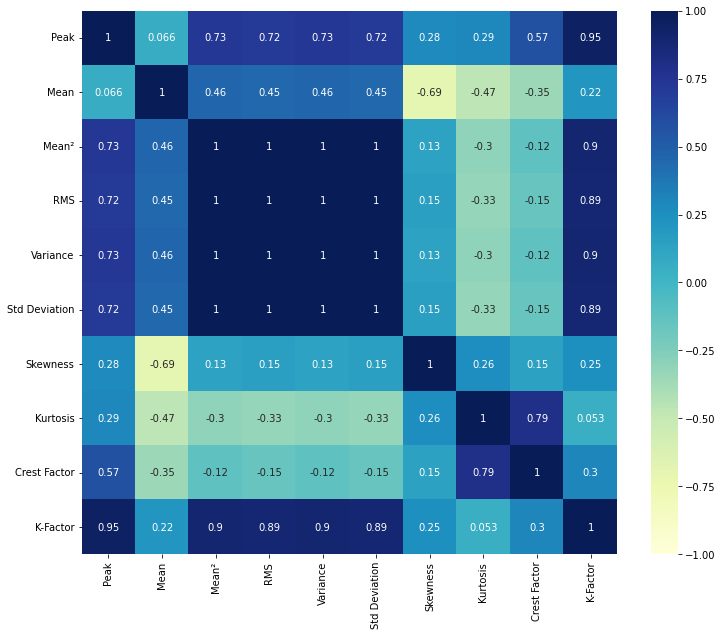

In [ ]:
# Correlação entre features

corrMatrix = X_mixed.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corrMatrix, annot=True, vmin=-1, vmax=1, cmap='YlGnBu')


In [ ]:
#sns.pairplot(dataset, hue='Condição', palette='Dark2')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


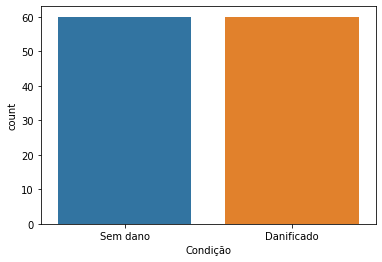

In [ ]:
# quantidade de outputs por classe

sns.countplot(y_mixed)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


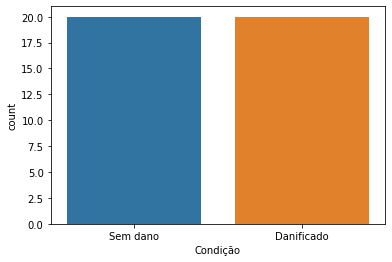

In [ ]:
sns.countplot(y_no_noise)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


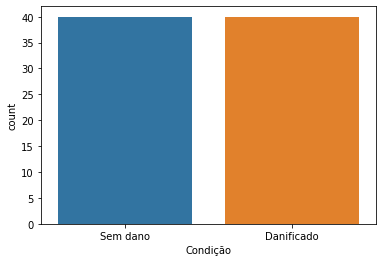

In [ ]:
sns.countplot(y_just_noise)

plt.show()

## **Seleção de features**



### Informação mútua



In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
MI = mutual_info_classif(X_mixed.values, y_mixed.values.reshape(y_mixed.shape[0]))

In [ ]:
FeaturesMI = pd.DataFrame(data=list(zip(feature_names, MI)), columns=['Features', 'MI'])

FeaturesMI = FeaturesMI.sort_values(by=['MI'], ascending=False).reset_index(drop=True)

FeaturesMI['MI'] = FeaturesMI['MI']/FeaturesMI['MI'].max()

FeaturesMI

,Features,MI
0,Crest Factor,1.000000
1,Peak,0.974656
2,Kurtosis,0.901022
3,K-Factor,0.845144
4,Mean²,0.779097
5,RMS,0.779097
6,Variance,0.779097
7,Std Deviation,0.779097
8,Mean,0.760750
9,Skewness,0.063540


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RANDOM_STATE = 31

RF = RandomForestClassifier(random_state=RANDOM_STATE)

RF.fit(X_mixed.values, y_mixed.values.reshape(y_mixed.shape[0]))

importances = RF.feature_importances_

In [ ]:
FeaturesRF = pd.DataFrame(data=list(zip(feature_names, importances)), columns=['Features', 'Scores'])

FeaturesRF = FeaturesRF.sort_values(by=['Scores'], ascending=False).reset_index(drop=True)

FeaturesRF['Scores'] = FeaturesRF['Scores']/FeaturesRF['Scores'].max()

FeaturesRF

,Features,Scores
0,Kurtosis,1.000000
1,Crest Factor,0.641339
2,Peak,0.538118
3,RMS,0.527730
4,Std Deviation,0.391287
5,K-Factor,0.359386
6,Skewness,0.148136
7,Variance,0.137625
8,Mean²,0.116629
9,Mean,0.082401


### K-best

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
seletorFeatures = SelectKBest(f_classif, k=X_mixed.shape[1])

seletorFeatures.fit(X_mixed.values, y_mixed.values.reshape(y_mixed.shape[0]))

SelectKBest(k=10, score_func=<function f_classif at 0x7f7383f915f0>)

In [ ]:
FeaturesKBEST = pd.DataFrame(data=list(zip(feature_names, seletorFeatures.scores_)), columns=['Features', 'Scores'])

FeaturesKBEST = FeaturesKBEST.sort_values(by=['Scores'], ascending=False).reset_index(drop=True)

FeaturesKBEST['Scores'] = FeaturesKBEST['Scores']/FeaturesKBEST['Scores'].max()

FeaturesKBEST

,Features,Scores
0,Kurtosis,1.000000
1,Peak,0.606956
2,K-Factor,0.433371
3,Crest Factor,0.402432
4,Variance,0.217903
5,Mean²,0.217903
6,Std Deviation,0.203090
7,RMS,0.203090
8,Skewness,0.048227
9,Mean,0.002665


In [ ]:
# Dividindo dataset para treinamento e teste

X_train_mixed, X_test_mixed, y_train_mixed, y_test_mixed = train_test_split(X_mixed, y_mixed, test_size=0.33, random_state=0)

X_train_no_noise, X_test_no_noise, y_train_no_noise, y_test_no_noise = train_test_split(X_no_noise, y_no_noise, test_size=0.33, random_state=0)

X_train_just_noise, X_test_just_noise, y_train_just_noise, y_test_just_noise = train_test_split(X_just_noise, y_just_noise, test_size=0.33, random_state=0)

In [ ]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

model_LR = LogisticRegression(solver='liblinear', random_state=0).fit(X_train_mixed, y_train_mixed)

#print('Acurácia:', model_LR.score(X_mixed, y_mixed))
print()
print('Confusion matrix:', confusion_matrix(y_test_mixed, model_LR.predict(X_test_mixed)))


Confusion matrix: [[10  9]
 [ 8 13]]


In [ ]:
# aplicando SVM (sem otimização de parâmetros) | dataset misto

from sklearn import svm

clf = svm.SVC(kernel='rbf')
clf.fit(X_train_mixed, y_train_mixed)

y_pred = clf.predict(X_test_mixed)

from sklearn import metrics

print("Acurácia:",metrics.accuracy_score(y_test_mixed, y_pred))
print()
print(metrics.classification_report(y_test_mixed, y_pred))
print()
# Usar os dados de teste para determinar a matriz de confusão
# print('Confusion matrix:', confusion_matrix(y_mixed, clf.predict(X_mixed)))

# Alteração
print('Confusion matrix:', confusion_matrix(y_test_mixed, y_pred))

Acurácia: 0.7

              precision    recall  f1-score   support

  Danificado       1.00      0.37      0.54        19
    Sem dano       0.64      1.00      0.78        21

    accuracy                           0.70        40
   macro avg       0.82      0.68      0.66        40
weighted avg       0.81      0.70      0.66        40


Confusion matrix: [[ 7 12]
 [ 0 21]]


In [ ]:
clfSCORES = svm.SVC(C=31.6228, break_ties=False, cache_size=200, class_weight=None, coef0=0.0, 
              decision_function_shape='ovr', degree=3, gamma=6.0, kernel='rbf', max_iter=-1, 
              probability=False, random_state=42, shrinking=True, tol=0.001, verbose=False)

cross_val_score(clfSCORES, X_just_noise, y_just_noise, cv = 7)

array([1., 1., 1., 1., 1., 1., 1.])

In [ ]:
# aplicando SVM (sem otimização de parâmetros) | dataset Só Ruído

from sklearn import svm
from sklearn.model_selection import cross_val_score

clf = svm.SVC(C=31.6228, break_ties=False, cache_size=200, class_weight=None, coef0=0.0, 
              decision_function_shape='ovr', degree=3, gamma=6.0, kernel='rbf', max_iter=-1, 
              probability=False, random_state=42, shrinking=True, tol=0.001, verbose=False)

clf.fit(X_train_just_noise, y_train_just_noise) # treino

y_pred = clf.predict(X_test_just_noise)

from sklearn import metrics

print("Acurácia:",metrics.accuracy_score(y_test_just_noise, y_pred))
print()
print(metrics.classification_report(y_test_just_noise,y_pred))
print()
# Usar os dados de teste para avaliar a matriz de confusão
print('Confusion matrix:', confusion_matrix(y_test_just_noise, y_pred))
print()
# scores = cross_val_score(clf, X_no_noise, y_no_noise, cv=5)
scores = cross_val_score(clf, X_just_noise, y_just_noise, cv = 7)
print(scores)
print()
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Acurácia: 1.0

              precision    recall  f1-score   support

  Danificado       1.00      1.00      1.00        14
    Sem dano       1.00      1.00      1.00        13

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27


Confusion matrix: [[14  0]
 [ 0 13]]

[1. 1. 1. 1. 1. 1. 1.]

1.00 accuracy with a standard deviation of 0.00


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.0316, 0.3162, 0.5000, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 31.6228, 100.0000, 316.2278], 
              'gamma': [0.0316, 0.0398, 0.0501, 0.0631, 0.0794, 0.3162, 0.3981, 0.5000, 0.5012, 0.6310, 0.7943, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10],
              'kernel': ['linear', 'poly', 'sigmoid', 'rbf']}

grid = GridSearchCV(svm.SVC(), param_grid, cv=5, refit=True, verbose=5)
grid.fit(X_train_mixed,y_train_mixed)

print(grid.best_estimator_)

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits
[CV] C=0.0316, gamma=0.0316, kernel=linear ...........................
[CV]  C=0.0316, gamma=0.0316, kernel=linear, score=0.750, total=   0.0s
[CV] C=0.0316, gamma=0.0316, kernel=linear ...........................
[CV]  C=0.0316, gamma=0.0316, kernel=linear, score=0.750, total=   0.0s
[CV] C=0.0316, gamma=0.0316, kernel=linear ...........................
[CV]  C=0.0316, gamma=0.0316, kernel=linear, score=0.688, total=   0.0s
[CV] C=0.0316, gamma=0.0316, kernel=linear ...........................
[CV]  C=0.0316, gamma=0.0316, kernel=linear, score=0.812, total=   0.0s
[CV] C=0.0316, gamma=0.0316, kernel=linear ...........................
[CV]  C=0.0316, gamma=0.0316, kernel=linear, score=0.562, total=   0.0s
[CV] C=0.0316, gamma=0.0316, kernel=poly .............................
[CV] . C=0.0316, gamma=0.0316, kernel=poly, score=0.750, total=   0.0s
[CV] C=0.0316, gamma=0.0316, kernel=poly .............................
[CV] .

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] . C=0.0316, gamma=0.0501, kernel=poly, score=0.750, total=   0.0s
[CV] C=0.0316, gamma=0.0501, kernel=poly .............................
[CV] . C=0.0316, gamma=0.0501, kernel=poly, score=0.688, total=   0.0s
[CV] C=0.0316, gamma=0.0501, kernel=poly .............................
[CV] . C=0.0316, gamma=0.0501, kernel=poly, score=0.812, total=   0.0s
[CV] C=0.0316, gamma=0.0501, kernel=poly .............................
[CV] . C=0.0316, gamma=0.0501, kernel=poly, score=0.562, total=   0.0s
[CV] C=0.0316, gamma=0.0501, kernel=sigmoid ..........................
[CV]  C=0.0316, gamma=0.0501, kernel=sigmoid, score=0.500, total=   0.0s
[CV] C=0.0316, gamma=0.0501, kernel=sigmoid ..........................
[CV]  C=0.0316, gamma=0.0501, kernel=sigmoid, score=0.500, total=   0.0s
[CV] C=0.0316, gamma=0.0501, kernel=sigmoid ..........................
[CV]  C=0.0316, gamma=0.0501, kernel=sigmoid, score=0.500, total=   0.0s
[CV] C=0.0316, gamma=0.0501, kernel=sigmoid ..........................


In [ ]:
# Melhores parâmetros para o SVM

#SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
#    decision_function_shape='ovr', degree=3, gamma=1,  kernel='rbf', max_iter=-1,
#    probability=False, random_state=None, shrinking=True, tol=0.001,
#    verbose=False)

#SVC(C=31.6228, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
#    decision_function_shape='ovr', degree=3, gamma=6.0, kernel='rbf',
#    max_iter=-1, probability=False, random_state=None, shrinking=True,
#    tol=0.001, verbose=False)

In [ ]:
grid_predictions = grid.predict(X_test_mixed)
print(metrics.confusion_matrix(y_test_mixed, grid_predictions))
print(metrics.classification_report(y_test_mixed, grid_predictions))
print("Acurácia:",metrics.accuracy_score(y_test_mixed, grid_predictions))

In [ ]:
# ANN

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# convertendo as classes de strings para inteiros
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

def creat_baseline():
  model_ANN = Sequential()
  model_ANN.add(Dense(12, input_dim=8, activation='relu'))
  model_ANN.add(Dense(1, activation='sigmoid'))
  model_ANN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model_ANN

estimatior = KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=2)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, encoded_Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))